# **Data 512: HW 1 - Professionalism & Reproducibility**
The goal of this assignment is to construct, analyze, and publish datasets of monthly article traffic based on access type for a select set of pages from English Wikipedia from July 1, 2015 through September 30, 2024. The purpose of the assignment is to develop and follow best practices for open scientific research as exemplified by the repository. We are specifically focusing on a subset of the English Wikipedia articles that represents a large number of rear diseases which was collected from [National Organization for Rare Diseases (NORD)](https://rarediseases.org).

## Part 2: Analysis (Data Visualization)

In this part, we will use the three JSON files from Part 1, and conduct a basic visual analysis. The analysis will focus on graphing specific subsets of the data as a timeseries chart.

As part of this step, we will create 3 graphs:

1. Maximum Average and Minimum Average - The first graph contains time series for the articles that have the highest average page requests and the lowest average page requests for desktop access and mobile access over the entire time series.

2. Top 10 Peak Page Views - The second graph contains time series for the top 10 article pages by largest (peak) page views over the entire time series by access type. The graph contains the top 10 for desktop and top 10 for mobile access (20 lines).

3. Fewest Months of Data - The third graph shows pages that have the fewest months of available data. The graph shows the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access.

Note that, mobile data will always be ploted with solid lines, and desktop with dotted lines for easy distinction.

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Switching to the required folder (user might have to change in case trying to reproduce)
%cd 'drive/MyDrive/Data 512/data-512-homework_1'

/content/drive/MyDrive/Data 512/data-512-homework_1


In [3]:
# These are standard python modules
import json

# These modules are not a standard Python module.
# You will need to install this with pip/pip3 if you do not already have it
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In this step we load the required data while ensuring error handling incase a data file doesn't exist or it's not a valid JSON

In [4]:
def load_json(filename):
    """
    This function attempts to open and load a JSON file from the specified path.
    It also handles errors incase the file doesn't exist or is not a JSON.

    Args:
        filename (str): The path to the JSON file to load.

    Returns:
        dict or None: If successful, returns the JSON data as a Python dictionary.
                      If an error occurs, returns None and prints an error message.

    Raises:
        FileNotFoundError: If the file is not found at the specified path.
        JSONDecodeError: If the file is not a valid JSON format.
    """
    try:
        with open(filename, 'r') as f:
            return json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        print(f"Error: There was an issue loading the file '{filename}'. Please check if the file exists and if the JSON is valid.")
        return None

# Load the required JSON files
data_desktop_views = load_json("./JSON Data Files/rare-disease_monthly_desktop_201507-202409.json")
data_mobile_views = load_json("./JSON Data Files/rare-disease_monthly_mobile_201507-202409.json")

### **Graph 1: Maximum Average and Minimum Average**

**In this section, we will focus on visualing the maximum and minimum average page requests for desktop access and mobile access over the entire time series.**

The code below processes Wikipedia pageview data for mobile and desktop platforms to compute average pageviews for each article. It identifies the articles with the highest and lowest average views and extracts the time series data for those articles. The code also provides functions to process the data, calculate extremes (min/max average views), and generate time series for further analysis or visualization.


In [5]:
# Helper function to process the data
def process_data(data):
    """
    This function processes the pageview data for multiple diseases, calculating average views and
    generating time series data for each disease.

    Args:
        data (dict): A dictionary where the keys are disease names and the values contain pageview data from JSON

    Returns:
        dict: A dictionary where each key is a disease name and the value is another dictionary that contains:
              - 'avg_views': The average number of views for the disease across all timestamps.
              - 'time_series': A pandas Series object where the index is the timestamp (datetime) and the
                               values are the views for each timestamp.
    """
    processed = {}
    for disease, entries in data.items():
        df = pd.DataFrame(entries)
        df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H')
        # Calculate the average number of views for this disease
        avg_views = df['views'].mean()
        # Store the results in a dictionary: the average views and the time series data
        processed[disease] = {
            'avg_views': avg_views,
            'time_series': df.set_index('timestamp')['views']
        }
    return processed


# This function processes mobile and desktop data and finds the min/max averages
def process_and_find_extremes(mobile_data, desktop_data):
    """
    This function processes mobile and desktop data to calculate the average views and
    identify the articles with the minimum and maximum average views.

    Args:
        mobile_data (dict): JSON data as a dictionary for mobile views.
        desktop_data (dict): JSON data as a dictionary for desktop views.

    Returns:
        tuple: Processed mobile and desktop data along with articles with min/max average views.
    """
    # Process the mobile and desktop data using the helper function
    processed_mobile = process_data(mobile_data)
    processed_desktop = process_data(desktop_data)

    # Convert the processed data to DataFrame to find extremes
    mobile_df = pd.DataFrame(processed_mobile).T
    desktop_df = pd.DataFrame(processed_desktop).T

    # Find max and min average views for both mobile and desktop
    max_mobile = mobile_df['avg_views'].idxmax()
    min_mobile = mobile_df['avg_views'].idxmin()
    max_desktop = desktop_df['avg_views'].idxmax()
    min_desktop = desktop_df['avg_views'].idxmin()

    return processed_mobile, processed_desktop, min_mobile, max_mobile, min_desktop, max_desktop

# Process and find the extremes
mobile_processed, desktop_processed, min_mobile, max_mobile, min_desktop, max_desktop = process_and_find_extremes(data_mobile_views, data_desktop_views)

# Extract time series for max/min diseases for both mobile and desktop
max_desktop_series = desktop_processed[max_desktop]['time_series']
min_desktop_series = desktop_processed[min_desktop]['time_series']
max_mobile_series = mobile_processed[max_mobile]['time_series']
min_mobile_series = mobile_processed[min_mobile]['time_series']


Now we visualize the max/min average page requests for desktop access and mobile access over the entire time series.

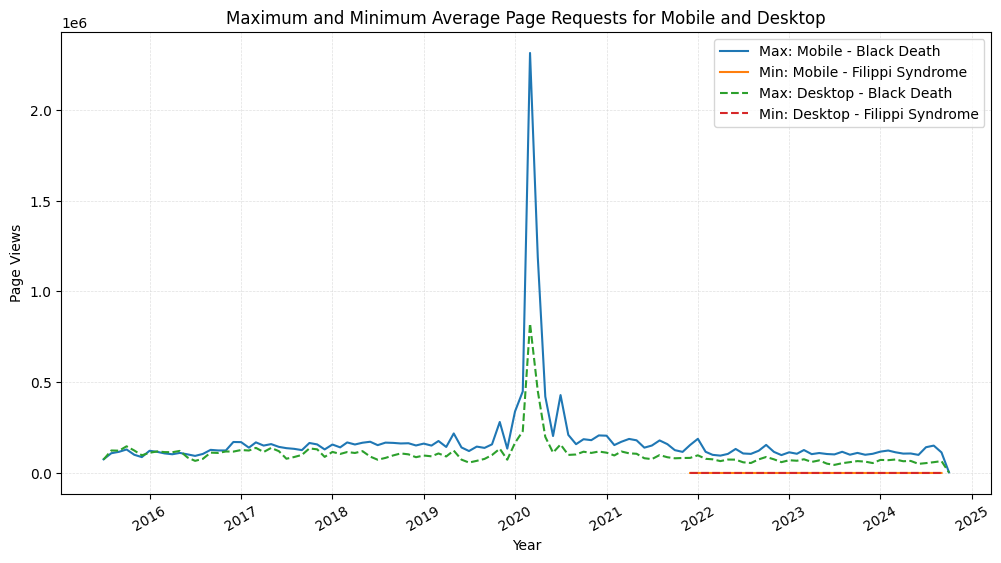

In [6]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Plot mobile data (solid lines)
plt.plot(max_mobile_series.index, max_mobile_series.values, label=f'Max: Mobile - {max_mobile}', linestyle='-')
plt.plot(min_mobile_series.index, min_mobile_series.values, label=f'Min: Mobile - {min_mobile}', linestyle='-')

# Plot desktop data (dotted lines)
plt.plot(max_desktop_series.index, max_desktop_series.values, label=f'Max: Desktop - {max_desktop}', linestyle='--')
plt.plot(min_desktop_series.index, min_desktop_series.values, label=f'Min: Desktop - {min_desktop}', linestyle='--')

# Add grid and other plot details
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Maximum and Minimum Average Page Requests for Mobile and Desktop')
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.legend()
plt.xticks(rotation=30)

# Save the figure
plt.savefig('./Generated Graphs/max_min_avg_analysis.png')
plt.show()


We can see that the article on disease "Black Death" has the maximum average page requests, both in deskop and mobile, whereas "Filipi Syndrome" has minium average page requests in both. We also notice that the number of views peaked during the first half of 2020. One can also notice that in terms of maximum average page requests, mobile does way better than the desktop. It's also noteworthy that the 'Filipi Syndrome' is only present starting late 2021.

### **Graph 2: Top 10 Peak Page Views**

**In this section, we will focus on visualizing the top 10 article pages by largest (peak) page views over the entire time series by access type.**

The code below finds the top 10 peak views for each disease in mobile and desktop data using the processed data from above, and then prepares and returns the corresponding timeseries data for these top-viewed diseases.

In [7]:
def find_top_peaks(processed_data):
    """
    This function finds the top 10 peak views for each access type (mobile or desktop) from the processed data.

    Args:
        processed_data (dict): A dictionary containing processed data for each disease,
                               with time series data of views.

    Returns:
        dict: A dictionary with the top 10 diseases and their peak view counts.
    """
    top_peaks = {}
    for disease, entries in processed_data.items():
        peak_view = max(entries['time_series'].values)  # Get the max views for this disease
        top_peaks[disease] = peak_view

    # Sort by peak views and return the top 10 as a dictionary
    sorted_peaks = sorted(top_peaks.items(), key=lambda x: x[1], reverse=True)[:10]
    return dict(sorted_peaks)

# Find the top 10 peak views for mobile and desktop data
top_mobile_peaks = find_top_peaks(mobile_processed)
top_desktop_peaks = find_top_peaks(desktop_processed)

# Display the top peaks
print("Top Mobile Peaks:", top_mobile_peaks)
print("Top Desktop Peaks:", top_desktop_peaks)


def create_peak_time_series(processed_data, top_peaks):
    """
    This function prepares time series data for the top 10 peak view articles.

    Args:
        processed_data (dict): A dictionary containing the processed data for each disease.
        top_peaks (dict): A dictionary with the top 10 diseases and their peak view counts.

    Returns:
        dict: A dictionary with disease names as keys and their corresponding time series as values.
    """
    peak_series = {}
    for disease in top_peaks.keys():
        peak_series[disease] = pd.Series(processed_data[disease]['time_series']).sort_index()
    return peak_series

# Prepare the time series for the top 10 peak articles
top_mobile_series = create_peak_time_series(mobile_processed, top_mobile_peaks)
top_desktop_series = create_peak_time_series(desktop_processed, top_desktop_peaks)

Top Mobile Peaks: {'Black Death': 2313741, 'Pandemic': 2276916, 'Pfeiffer syndrome': 777886, 'Chloroquine': 777537, 'Stiff-person syndrome': 677927, 'Porphyria': 585872, 'Glioblastoma': 562173, 'Cleidocranial dysostosis': 485195, 'Botulism': 470273, 'Kawasaki disease': 448512}
Top Desktop Peaks: {'Pandemic': 1046521, 'Black Death': 823649, 'Chloroquine': 440897, 'Pfeiffer syndrome': 408153, 'Fibrodysplasia ossificans progressiva': 313785, 'Botulism': 302593, 'Robert Koch': 254656, 'Smallpox': 249177, 'Cleidocranial dysostosis': 191115, 'Amyotrophic lateral sclerosis': 186945}


The code below helps us visualize the top 10 article pages by largest (peak) page views over the entire time series by access type.

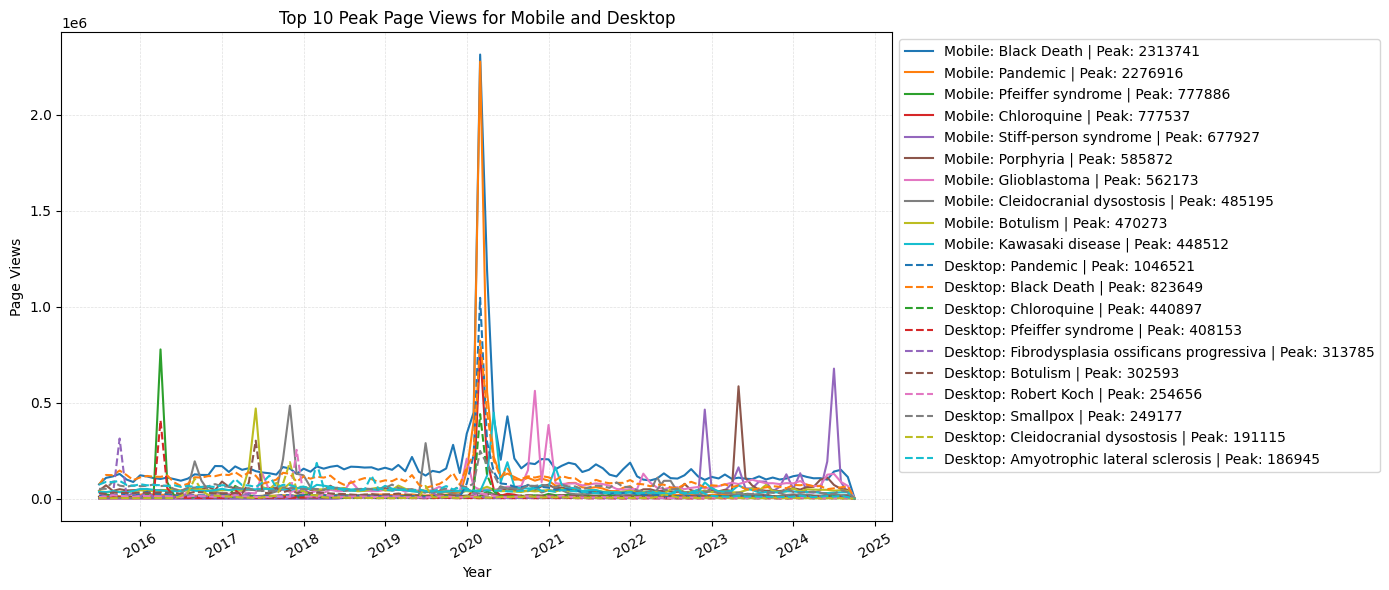

In [8]:
# Plotting the top 10 peak views for mobile and desktop
plt.figure(figsize=(14, 6))

# Plot Mobile Data (solid lines)
for disease, series in top_mobile_series.items():
    peak_value = top_mobile_peaks[disease]  # Get the peak value from the dictionary
    plt.plot(series.index, series.values, label=f'Mobile: {disease} | Peak: {peak_value}', linestyle='-')

# Plot Desktop Data (dotted lines)
for disease, series in top_desktop_series.items():
    peak_value = top_desktop_peaks[disease]  # Get the peak value from the dictionary
    plt.plot(series.index, series.values, label=f'Desktop: {disease} | Peak: {peak_value}', linestyle='--')

# Customize the graph
plt.title('Top 10 Peak Page Views for Mobile and Desktop')
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.xticks(rotation=30)
plt.tight_layout()

# Save the plot
plt.savefig('./Generated Graphs/top_10_peak_views_analysis.png')

# Display the plot
plt.show()

We can see from the above graph, that mobile continues to perfrom better in terms of pageviews as noted by the higher peaks on average. We also notice that "Pandemic" and "Black Death" are the top 2 titles in both desktop and mobile. It is also evident that Pandemic is peaking in 2020, which can be correlated to the COVID-19 Pandemic.

### **Graph 3: Fewest Months of Data**

**In this section we will focus on visualizing articles that have the fewest months of available data by access type.**

The code below counts the number of months of available data for each article, identifies the top 10 articles with the fewest months of data for mobile and desktop views, and prepares the corresponding time series for these articles.

In [9]:
def count_months_of_data(processed_data):
    """
    This function counts the number of months of available data for each article.

    Args:
        processed_data (dict): Processed data containing time series views for each disease.

    Returns:
        dict: A dictionary with the disease names as keys and the count of months of data as values.
    """
    months_count = {}
    for disease, entries in processed_data.items():
        months_count[disease] = len(entries['time_series'])  # Count distinct months
    return months_count

# Get months count for mobile and desktop data
mobile_months_count = count_months_of_data(mobile_processed)
desktop_months_count = count_months_of_data(desktop_processed)

def find_fewest_months(months_count):
    """
    This function finds the top 10 articles with the fewest number of months of available data.

    Args:
        months_count (dict): A dictionary with the number of months of data for each article.

    Returns:
        dict: A dictionary with the top 10 articles and their corresponding month count.
    """
    # Sort by month count and return the top 10
    sorted_months = sorted(months_count.items(), key=lambda x: x[1])[:10]
    return dict(sorted_months)

# Find the articles with the fewest months of data for mobile and desktop
fewest_mobile_months = find_fewest_months(mobile_months_count)
fewest_desktop_months = find_fewest_months(desktop_months_count)

def create_fewest_months_time_series(processed_data, fewest_months):
    """
    This function creates time series for the articles with the fewest months of available data.

    Args:
        processed_data (dict): Processed data containing time series views for each disease.
        fewest_months (dict): A dictionary with the articles having the fewest months of data.

    Returns:
        dict: A dictionary with disease names as keys and their time series data as values.
    """
    fewest_series = {}
    for disease in fewest_months.keys():
        fewest_series[disease] = pd.Series(processed_data[disease]['time_series']).sort_index()
    return fewest_series

# Prepare the time series for the articles with the fewest months of data
fewest_mobile_series = create_fewest_months_time_series(mobile_processed, fewest_mobile_months)
fewest_desktop_series = create_fewest_months_time_series(desktop_processed, fewest_desktop_months)

The code below helps us visualize articles that have the fewest months of available data by access type.

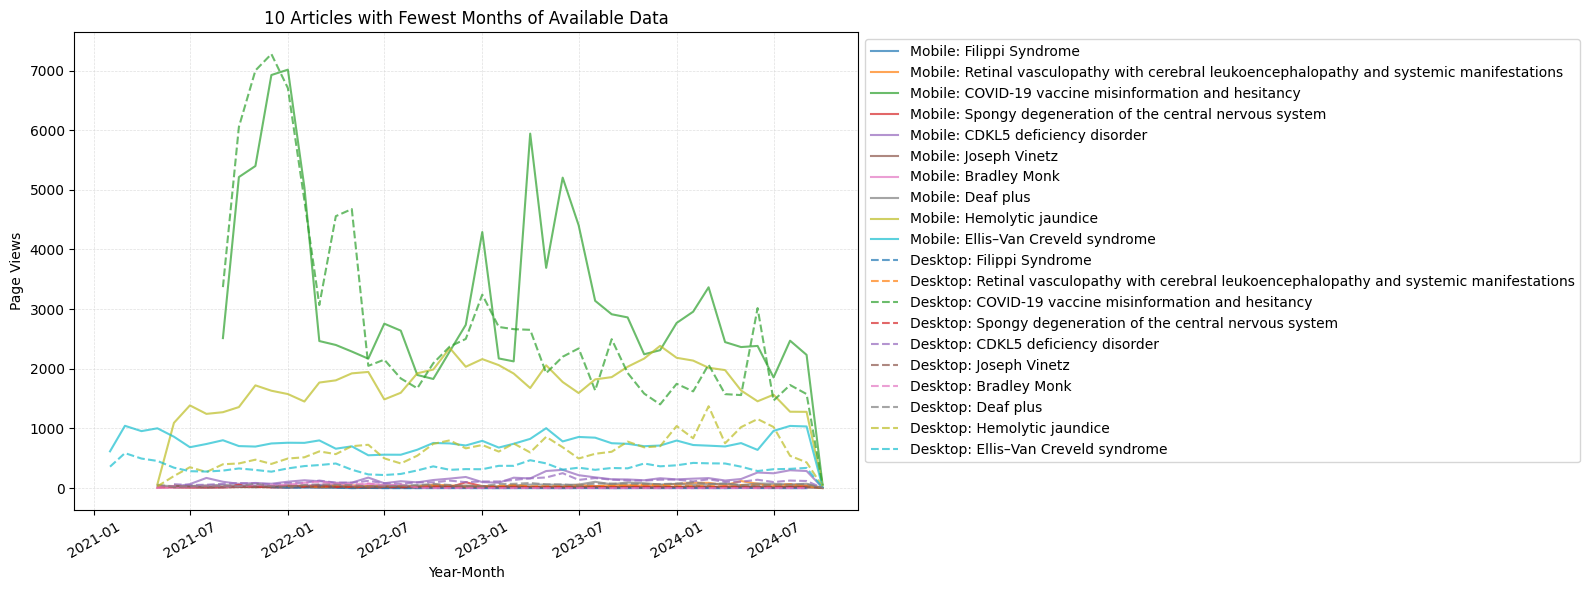

In [36]:
# Plotting the articles with the fewest months of data
plt.figure(figsize=(16, 6))

# Plot Mobile Data (solid lines)
for disease, series in fewest_mobile_series.items():
    plt.plot(series.index, series.values, label=f'Mobile: {disease}', linestyle='-', alpha=0.7)

# Plot Desktop Data (dotted lines)
for disease, series in fewest_desktop_series.items():
    plt.plot(series.index, series.values, label=f'Desktop: {disease}', linestyle='--', alpha=0.7)

# Customize the graph
plt.title('10 Articles with Fewest Months of Available Data')
plt.xlabel('Year-Month')
plt.ylabel('Page Views')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.xticks(rotation=30)
plt.tight_layout()

# Save the plot
plt.savefig('./Generated Graphs/fewest_months_of_data_analysis.png')

# Display the plot
plt.show()


We can see that the number of views is very low for articles with least number of months. This makes sense since they haven't been out for too long or aren't as popular. However, we notice a different trend for the article about `COVID-19 vaccine..`. This could make sense given 2021 is when the vaccine started being available. However, more research is required before making any conclusions.